In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split

In [2]:

# Section 1: Data exploration

# load KSI dataset into data frame
KSI_data = pd.read_csv('KSI.csv')


In [3]:
# preliminary data exploration
print(KSI_data.head())


              X             Y   INDEX_    ACCNUM  YEAR  \
0 -8.844611e+06  5.412414e+06  3387730  892658.0  2006   
1 -8.844611e+06  5.412414e+06  3387731  892658.0  2006   
2 -8.816480e+06  5.434843e+06  3388101  892810.0  2006   
3 -8.829728e+06  5.419071e+06  3389067  893184.0  2006   
4 -8.816480e+06  5.434843e+06  3388102  892810.0  2006   

                     DATE  TIME          STREET1         STREET2 OFFSET  ...  \
0  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
1  2006/03/11 05:00:00+00   852       BLOOR ST W     DUNDAS ST W    NaN  ...   
2  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   
3  2006/01/01 05:00:00+00   236     WOODBINE AVE     O CONNOR DR    NaN  ...   
4  2006/03/11 05:00:00+00   915  MORNINGSIDE AVE  SHEPPARD AVE E    NaN  ...   

  AG_DRIV REDLIGHT  ALCOHOL  DISABILITY  HOOD_158 NEIGHBOURHOOD_158 HOOD_140  \
0     Yes      NaN      NaN         NaN        88   High Park North       88   
1     Yes 

In [18]:
# print name, number of missing values, and data type for each column
# print(KSI_data.info())

KSI_data.describe()
print(f'Number of Missing Values:\n\n{KSI_data.isnull().sum()}\n\nData Type for Each Column:\n{KSI_data.dtypes}')



Number of Missing Values:

X                        0
Y                        0
INDEX_                   0
ACCNUM                4930
YEAR                     0
DATE                     0
TIME                     0
STREET1                  0
STREET2               1684
OFFSET               14792
ROAD_CLASS             376
DISTRICT               105
WARDNUM                862
LATITUDE                 0
LONGITUDE                0
LOCCOORD                95
ACCLOC                5450
TRAFFCTL                34
VISIBILITY              20
LIGHT                    0
RDSFCOND                25
ACCLASS                  5
IMPACTYPE                4
INVTYPE                 16
INVAGE                   0
INJURY                1611
FATAL_NO             17367
INITDIR               5052
VEHTYPE               3228
MANOEUVER             7660
DRIVACT               8951
DRIVCOND              8954
PEDTYPE              15134
PEDACT               15112
PEDCOND              15110
CYCLISTYPE           17420
C

In [19]:
# display column description only if column has description
column_descriptions = KSI_data.describe()
for column in column_descriptions.columns:
    print(column_descriptions[column], '\n')


count    1.819400e+04
mean    -8.838345e+06
std      1.162533e+04
min     -8.865305e+06
25%     -8.846591e+06
50%     -8.838448e+06
75%     -8.829671e+06
max     -8.807929e+06
Name: X, dtype: float64 

count    1.819400e+04
mean     5.420748e+06
std      8.682160e+03
min      5.402162e+06
25%      5.413242e+06
50%      5.419556e+06
75%      5.427813e+06
max      5.443099e+06
Name: Y, dtype: float64 

count    1.819400e+04
mean     3.818870e+07
std      3.726463e+07
min      3.363207e+06
25%      5.391370e+06
50%      7.644612e+06
75%      8.078261e+07
max      8.170606e+07
Name: INDEX_, dtype: float64 

count    1.326400e+04
mean     4.248444e+08
std      1.065503e+09
min      2.530100e+04
25%      1.021229e+06
50%      1.197308e+06
75%      1.365020e+06
max      4.008024e+09
Name: ACCNUM, dtype: float64 

count    18194.000000
mean      2012.934869
std          4.754258
min       2006.000000
25%       2009.000000
50%       2012.000000
75%       2017.000000
max       2022.000000
Name: 

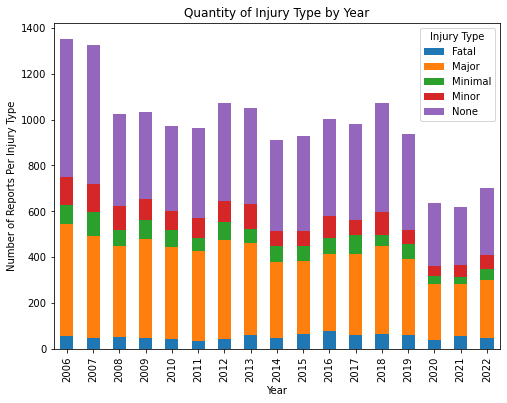

In [20]:

# plot quantity of each injury type by year as bar graph
injury_type_counts = KSI_data.groupby(['YEAR', 'INJURY']).size().unstack(fill_value=0) # get quantities for injury counts by year
injury_type_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xlabel('Year')
plt.ylabel('Number of Reports Per Injury Type')
plt.title('Quantity of Injury Type by Year')
plt.legend(title='Injury Type')
plt.show()


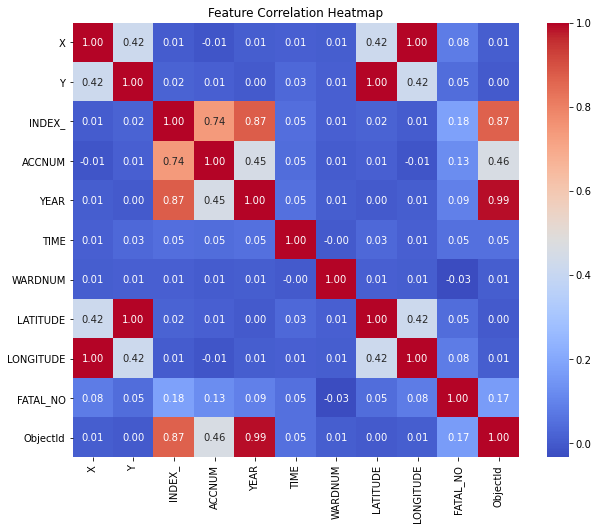

In [21]:

# calculating the correlations of data 
corr = KSI_data.select_dtypes(include=['float64', 'int64']).corr()
# plotting correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


No     17406
Yes      788
Name: ALCOHOL, dtype: int64


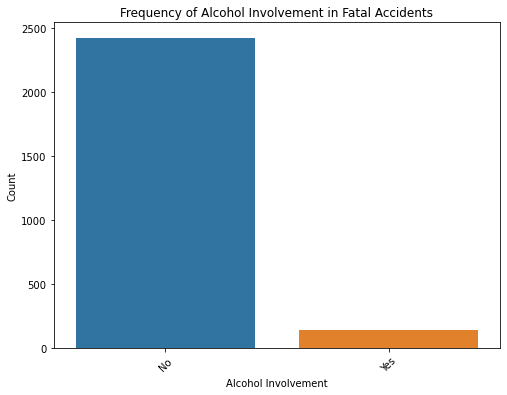

In [22]:

# plotting the frequency of 'ALCOHOL' involvement in fatal accidents
# replacing NaN values in ALCOHOL column with "No"
KSI_data['ALCOHOL'] = KSI_data['ALCOHOL'].fillna('No')
print(KSI_data['ALCOHOL'].value_counts())
fatal_accidents = KSI_data[KSI_data['ACCLASS'] == 'Fatal']

categorical_features = ['ALCOHOL']


plt.figure(figsize=(8, 6))
sns.countplot(data=fatal_accidents, x='ALCOHOL')
plt.title('Frequency of Alcohol Involvement in Fatal Accidents')
plt.xlabel('Alcohol Involvement')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


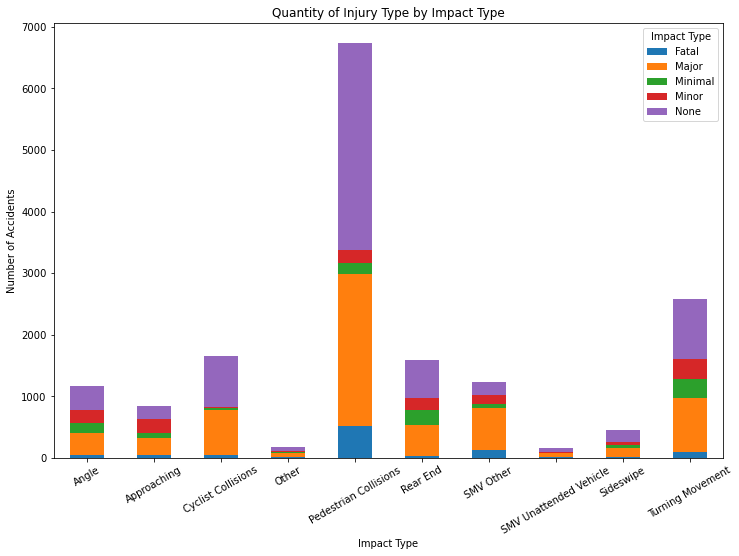

In [23]:

# plotting number of road accidents by impact type for each injury category
accident_count = KSI_data.groupby(['IMPACTYPE',  'INJURY']).size().unstack(fill_value=0) 
accident_count = accident_count.reset_index()
accident_count.plot(kind='bar', stacked=True, figsize=(12,8))
plt.xticks(range(len(accident_count['IMPACTYPE'])), accident_count['IMPACTYPE'], rotation=30)
plt.xlabel('Impact Type')
plt.ylabel('Number of Accidents')
plt.title('Quantity of Injury Type by Impact Type')
plt.legend(title='Impact Type')
plt.show()


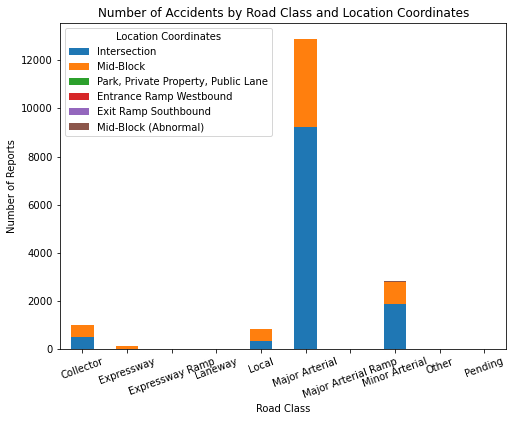

In [24]:

# plotting number of road accidents given the road class and location ordinants
accident_counts = KSI_data.groupby(['ROAD_CLASS', 'LOCCOORD']).size().unstack(fill_value=0)
accident_counts.plot(kind='bar', stacked=True, figsize=(8,6))
plt.xlabel('Road Class')
plt.ylabel('Number of Reports')
plt.title('Number of Accidents by Road Class and Location Coordinates')
plt.xticks(rotation=20)
plt.legend(title='Location Coordinates')
plt.show()


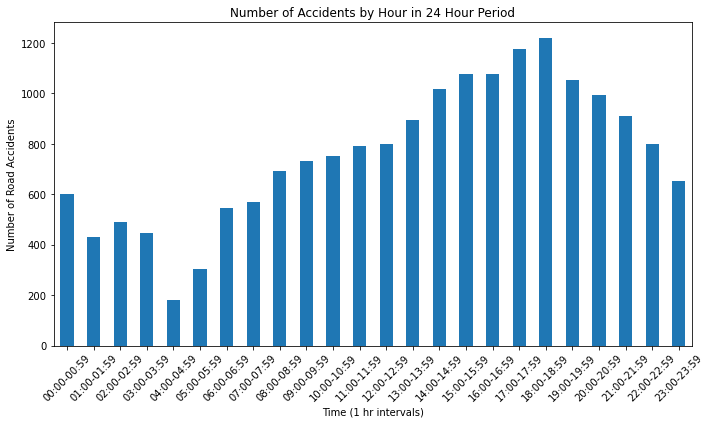

In [25]:

# plotting number of road accidents for each hour of the day
# convert time to string and fill with 0's if necessary
KSI_data['TIME'] = KSI_data['TIME'].astype(str).str.zfill(4)
# create function to return appropriate time range for accident
def time_ranges(time):
    hour = int(time[:2])
    hour_range_start = hour // 1 * 1  
    return f'{hour_range_start:02d}:00-{hour_range_start:02d}:59'
# create new column with ranges as values
KSI_data['TimeRange'] = KSI_data['TIME'].apply(time_ranges)
# get counts for each range and plot 
time_range_counts = KSI_data.groupby('TimeRange').size()
time_range_counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Time (1 hr intervals)')
plt.ylabel('Number of Road Accidents')
plt.title('Number of Accidents by Hour in 24 Hour Period')
plt.xticks(rotation=45)  
plt.tight_layout() 
plt.show()


In [26]:

# Section 2: Data modelling

# preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


In [27]:

# preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])


In [28]:

# bundling preprocessing for num and cat data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, selector(dtype_include=['int64', 'float64'])),
        ('cat', categorical_transformer, selector(dtype_include=object))
    ]
)


In [29]:
# dropping rows where ACCLASS data is NaN
KSI_data.dropna(subset=['ACCLASS'], inplace=True)


In [30]:
# splitting dataset into training and testing sets
X = KSI_data.drop(['ACCLASS'], axis=1)
y = KSI_data['ACCLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())


                  X             Y    INDEX_     ACCNUM  YEAR  \
9066  -8.843520e+06  5.412722e+06   7823538  1358324.0  2013   
16446 -8.846213e+06  5.429730e+06  81458921        NaN  2019   
15257 -8.824794e+06  5.422484e+06  80976490        NaN  2018   
10594 -8.830426e+06  5.420027e+06   7886326  1385276.0  2013   
12376 -8.853932e+06  5.427331e+06  80632453        NaN  2016   

                         DATE  TIME         STREET1        STREET2  \
9066   2013/04/28 04:00:00+00  1241      BLOOR ST W  LANSDOWNE AVE   
16446  2019/10/15 04:00:00+00  0442     DUFFERIN ST    FINCH AVE W   
15257  2018/12/01 05:00:00+00  1555   BIRCHMOUNT RD    FOXRIDGE DR   
10594  2013/11/03 04:00:00+00  1625  18 LONGSPUR RD            NaN   
12376  2016/05/10 04:00:00+00  0648     FINCH AVE W      SIGNET DR   

             OFFSET  ... REDLIGHT ALCOHOL  DISABILITY  HOOD_158  \
9066            NaN  ...      NaN      No         NaN        83   
16446           NaN  ...      NaN      No         NaN       